In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img = cv2.imread('dataset/Celebrity Faces Dataset/Brad Pitt/002_cc1b9701.jpg')

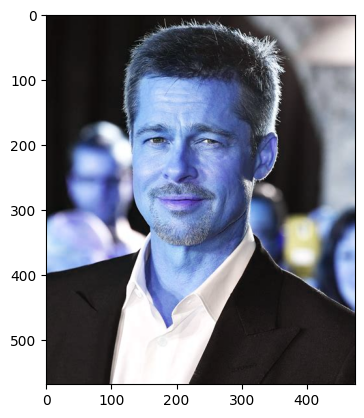

In [3]:
plt.imshow(img)

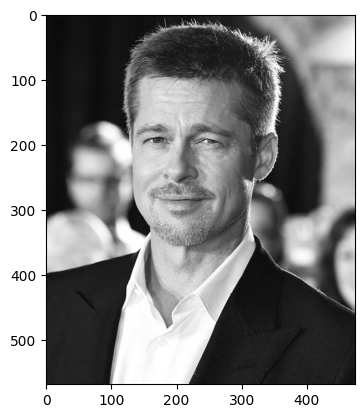

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow((gray_img), cmap='gray')

In [5]:
eyes_cascade = cv2.CascadeClassifier("server/haar_cacades/haarcascade_eye.xml")
faces_cascade = cv2.CascadeClassifier("server/haar_cacades/haarcascade_frontalface_alt2.xml")

In [ ]:
# face = faces_cascade.detectMultiScale(gray_img)
# x, y, w, h = face[0]
# img_face = cv2.rectangle(gray_img, (x, y), (x + w, y + h), (255, 0, 0), 3)

# plt.imshow(img_face, cmap='gray')

In [7]:
# eyes = eyes_cascade.detectMultiScale(gray_img)
# for (ex, ey, ew, eh) in eyes:
#     img_eye = cv2.rectangle(gray_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 3)
# plt.imshow(img_eye)

In [8]:
cv2.destroyAllWindows()

In [9]:
def detect_face_and_eyes(path):
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    faces = faces_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x, y, w, h) in faces:
        img_face = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
        cropped_gray = gray_img[y:y + h, x:x + w]
        cropped_face = img_face[y:y + h, x:x + w]

        eyes = eyes_cascade.detectMultiScale(cropped_gray)
        if len(eyes) >= 2:
            return cropped_face
    

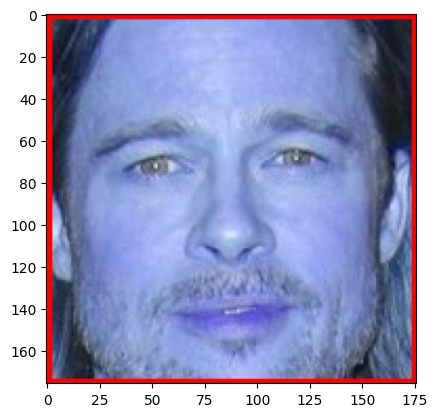

In [10]:
cropped_face = detect_face_and_eyes('dataset/Celebrity Faces Dataset/Brad Pitt/087_155f1f74.jpg')
plt.imshow(cropped_face, cmap='gray')

In [11]:
dataset_path = './dataset/Celebrity Faces Dataset/'
cleaned_data_path = './cleaned_data/' 

In [12]:
import os
folder = []
for name in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, name)):
        folder.append(dataset_path+name)

In [13]:
folder

['./dataset/Celebrity Faces Dataset/Brad Pitt',
 './dataset/Celebrity Faces Dataset/Hugh Jackman',
 './dataset/Celebrity Faces Dataset/Johnny Depp',
 './dataset/Celebrity Faces Dataset/Robert Downey Jr',
 './dataset/Celebrity Faces Dataset/Will Smith']

In [14]:
import shutil
if os.path.exists(cleaned_data_path):
    shutil.rmtree(cleaned_data_path)
os.makedirs(cleaned_data_path)

In [15]:
cropped_path = []
celeb_directories = {}

for celebrity_folder in folder:
    celeb_name = celebrity_folder.split('/')[-1]
    print("Processing images of:", celeb_name)
    if not os.path.exists(cleaned_data_path+celeb_name):
        os.makedirs(cleaned_data_path+celeb_name)
    count = 0
    for img_name in os.listdir(celebrity_folder):
        img_path = celebrity_folder + '/' + img_name
        cropped_face = detect_face_and_eyes(img_path)

        if cropped_face is not None:
            path_to_save = cleaned_data_path + celeb_name+'/' + celeb_name + str(count)+".png"
            cropped_path.append(path_to_save)
            cv2.imwrite(path_to_save, cropped_face)
            count += 1
            if count == 50: # limit to 50 images per celebrity
                break
    celeb_directories[celeb_name] = cropped_path
    cropped_path = []
        
   

Processing images of: Brad Pitt
Processing images of: Hugh Jackman
Processing images of: Hugh Jackman
Processing images of: Johnny Depp
Processing images of: Johnny Depp
Processing images of: Robert Downey Jr
Processing images of: Robert Downey Jr
Processing images of: Will Smith
Processing images of: Will Smith


In [16]:
#celeb_directories["Hugh Jackman"]

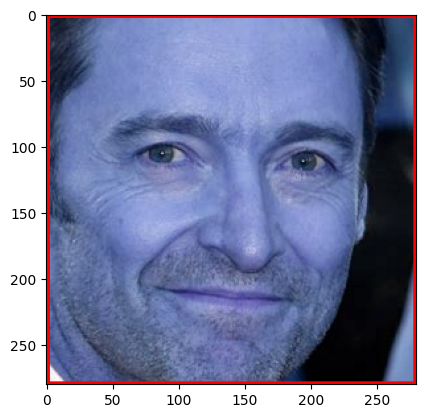

In [18]:
temp = cv2.imread("cleaned_data/Hugh Jackman/Hugh Jackman3.png")
plt.imshow(temp)

In [ ]:
from keras_facenet import FaceNet

import os
import cv2
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load FaceNet model
embedder = FaceNet()

# Prepare data from cleaned_data directory
X_embeds = []
y_labels = []
label_map = {}
label_count = 0

In [ ]:
for celeb in os.listdir('cleaned_data'):
    celeb_path = os.path.join('cleaned_data', celeb)
    if os.path.isdir(celeb_path):
        if celeb not in label_map:
            label_map[celeb] = label_count
            label_count += 1
        for img_name in os.listdir(celeb_path):
            img_path = os.path.join(celeb_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # FaceNet expects RGB images
                embed = embedder.embeddings([img_rgb])[0]
                X_embeds.append(embed)
                y_labels.append(label_map[celeb])

X_embeds = np.array(X_embeds)
y_labels = np.array(y_labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_embeds, y_labels, test_size=0.2, random_state=42)


# --- End FaceNet Training Example ---


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━

d:\Miniconda\envs\img_gen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━

d:\Miniconda\envs\img_gen\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6800 - loss: 1.4984 - val_accuracy: 1.0000 - val_loss: 1.3086
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6800 - loss: 1.4984 - val_accuracy: 1.0000 - val_loss: 1.3086
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9850 - loss: 1.1182 - val_accuracy: 1.0000 - val_loss: 0.7946
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9850 - loss: 1.1182 - val_accuracy: 1.0000 - val_loss: 0.7946
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.6016 - val_accuracy: 1.0000 - val_loss: 0.2940
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.6016 - val_accuracy: 1.0000 - val_loss: 0.2940
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9950 - loss: 0.2143 - val_accuracy: 1.0000 - val_loss: 0.0785
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9950 - loss: 0.2143 - val_accuracy: 1.0000 - val_loss: 0.0785
E

In [ ]:
# Simple classifier (MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

num_classes = len(label_map)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.2f}")

In [34]:
print(predict_face("dataset/Celebrity Faces Dataset/Brad Pitt/068_5ebbf7fb.jpg", embedder=embedder, model=model, label_map=label_map))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: Brad Pitt
Brad Pitt
Predicted class: Brad Pitt
Brad Pitt
